In [2]:
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
data.shape

(200, 4)

In [4]:
import seaborn as sns
%matplotlib inline

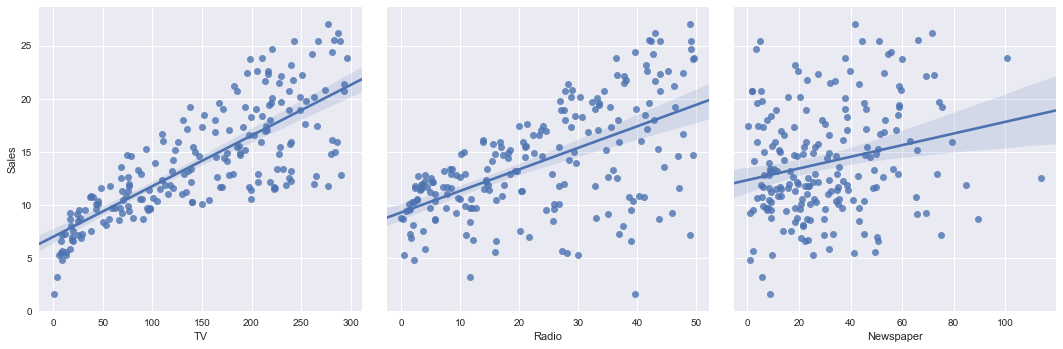

In [27]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=5, kind='reg')

In [28]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
# Equivalent to
# X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [29]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [30]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)
<class 'pandas.core.series.Series'>
(200,)


In [31]:
# Split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
# Default splits the data into 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


C:\Users\Aman Deep Singh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Linear Regression in Scikit-Learn

In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [37]:
zipped = zip(feature_cols, linreg.coef_)

In [35]:
feature_cols

['TV', 'Radio', 'Newspaper']

In [41]:
y_pred = linreg.predict(X_test)

In [48]:
# Define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

### Evaluation metrics for Linear Regression
#### Mean absolute error (MAE) is the mean absolute value of the errors

In [47]:
%%latex
\begin{align}
\frac{1}{n}\sum_1^n|y_i-\hat{y_i}| 
\end{align}

<IPython.core.display.Latex object>

In [50]:
# Calculate MAE
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


#### Mean squared error (MSE) is the mean of the squared errors

In [52]:
%%latex
\begin{align}
\frac{1}{n}\sum_1^n(y_i-\hat{y_i})^2 
\end{align}

<IPython.core.display.Latex object>

In [53]:
print(metrics.mean_squared_error(true, pred))

150.0


#### Root mean squared error (RMSE) is the square root of the mean of the squared errors

\begin{align}
\sqrt {\frac{1}{n}\sum_1^n(y_i-\hat{y_i})^2}
\end{align}

In [55]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139


In [56]:
# Computing RMSE for our sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303
